In [44]:
#import necessary libraries
import pandas as pd 
import numpy as np

from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc 

#encoding libraries
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split, cross_val_score

#import library for linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.tree import DecisionTreeRegressor

#import library for evalution of model
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel("Xiaomi India.xlsx")

In [3]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


In [4]:
df.drop("Customer",axis = 1, inplace = True)

In [5]:
df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,Monday,Chrome,13,4,8.5,2668.0
1,Saturday,Chrome,15,5,16.9,3469.0
2,Monday,Internet Explorer,20,6,7.3,5215.0
3,Monday,Chrome,42,6,30.1,10423.0
4,Saturday,Internet Explorer,20,6,13.3,5404.0


In [6]:
cat = 0
con = 0
for column in df.columns:
    if df[column].dtype != "object":
        print(f"This {column} is continious variable")
        con = con + 1
    else:
        print(f"This {column} is categorical variable")
        cat = cat + 1
print(con)
print(cat)

This Day is categorical variable
This Browser is categorical variable
This No. of Clicks is continious variable
This Pages Viewed is continious variable
This Time (min) is continious variable
This Amount Spent (Rs.) is continious variable
4
2


In [7]:
def custom_summary(df):
    result =[]
    for col in list(df.columns):
        stats = OrderedDict({"featureName":col,
                            "count":df[col].count(),
                            "datatype":df[col].dtype,
                            "min":df[col].min(),
                            "Q1":df[col].quantile(0.25),
                            "Q2":df[col].quantile(0.5),
                            "Q3":df[col].quantile(0.75),
                            "Q4":df[col].quantile(1.0),
                            "mean":df[col].mean(),
                            "stdv":df[col].std(),
                            "var":df[col].var(),
                            "kurt":df[col].kurt(),
                            "skew":df[col].skew(),
                            "range":df[col].min() - df[col].max(),
                            "IQR": df[col].quantile(0.75) - df[col].quantile(0.25)
                            })
        if df[col].skew()<-1.0:
            label = "Highly negatively skewed"
        elif -1.0<df[col].skew()<-0.5:
            label = "moderately negatively skewed"
        elif -0.5<df[col].skew()<0.5:
            label = "fairly symmetric"
        elif -0.5<df[col].skew()<0.5:
            label = "moderately positively skewed"
        else:
            label = "Highly positively skewed"
            
        stats['skewness comment'] = label;
        
        #Outliers identification
        upper_limit = stats['Q3'] + (1.5*stats['IQR'])
        lower_limit = stats['Q1'] - (1.5*stats['IQR'])
        if len([x for x in df[col] if x <lower_limit or x>upper_limit ]) > 0:
            outliers_label = "Has outliers"
        else:
            outliers_label = "No outliers"
        
        stats['Outlier comment'] = outliers_label
        #count =0
        #if (x for x in df[col] if x <lower_limit) or (x for x in df[col] if x>upper_limit):
        #    count +=1
        
        stats['number of outliers'] = len([x for x in df[col] if x <lower_limit or x>upper_limit ])
        stats['Percentage of outliers'] = stats['number of outliers']*100/stats['count']
        
        result.append(stats)
    resultdf = pd.DataFrame(data=result)
    return resultdf
    

In [8]:
custom_summary(df[['No. of Clicks', 'Pages Viewed', 'Time (min)']])

,featureName,count,datatype,min,Q1,Q2,Q3,Q4,mean,stdv,var,kurt,skew,range,IQR,skewness comment,Outlier comment,number of outliers,Percentage of outliers
0,No. of Clicks,43200,int64,8.0,18.0,22.5,29.0,46.0,23.74,8.267647,68.353982,0.025564,0.677900,-38.0,11.0,Highly positively skewed,Has outliers,864,2.0
1,Pages Viewed,43200,int64,2.0,3.0,4.5,6.0,10.0,4.82,2.016853,4.067694,0.034871,0.626857,-8.0,3.0,Highly positively skewed,No outliers,0,0.0
2,Time (min),43200,float64,4.3,8.5,11.4,15.1,32.9,12.81,6.002444,36.029334,2.053011,1.406018,-28.6,6.6,Highly positively skewed,Has outliers,1728,4.0


In [9]:
def odt_plots(df, col):
    fig,(ax1, ax2, ax3) = plt.subplots(1,3,figsize = (16,5))
    
    kwargs = {'fontsize':15, 'color':'black'}    #key word arguements
    
    #box plot with outliers
    sns.boxplot(df[col],ax=ax1,color = 'b')
    ax1.set_title('Box plot for '+col, **kwargs)
    ax1.set_xlabel('values', **kwargs)
    ax1.set_ylabel('Box distribution', **kwargs)
    
    #histogram with outliers
    sns.distplot(df[col],ax=ax2,color = 'r', fit=sc.norm)
    ax2.set_title('Histogram plot for '+col, **kwargs)
    ax2.set_xlabel('values', **kwargs)
    ax2.set_ylabel('Histrogram', **kwargs)
    
    #histogram with no outliers
    y = df
    sns.distplot(y[col], ax = ax3, color = 'y', fit=sc.norm)
    plt.show()
    

C:\Users\Abhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

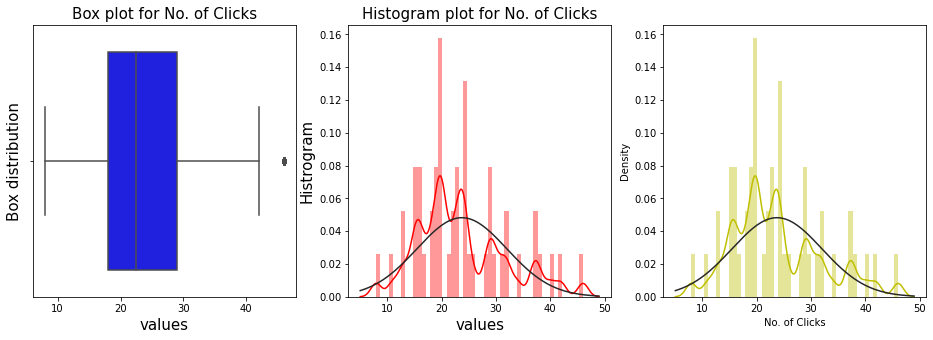

C:\Users\Abhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

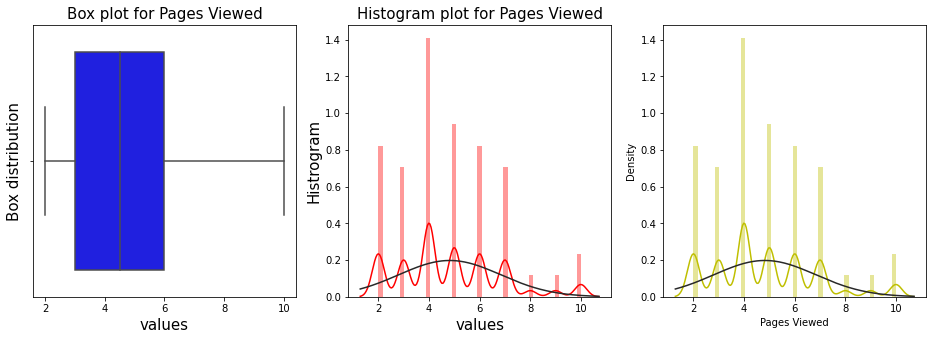

C:\Users\Abhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

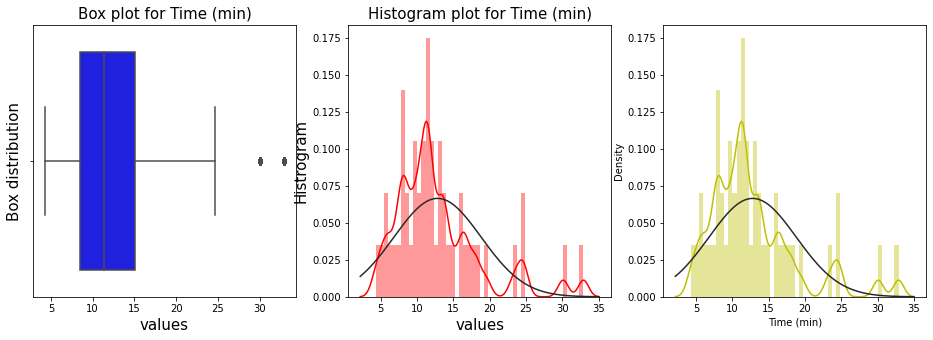

In [10]:
for col in df[['No. of Clicks', 'Pages Viewed', 'Time (min)']]:
    odt_plots(df[['No. of Clicks', 'Pages Viewed', 'Time (min)']], col)

In [11]:
#Label encoding
le = LabelEncoder()

In [12]:
df["Day"] = le.fit_transform(df["Day"])
df["Browser"] = le.fit_transform(df['Browser'])

In [13]:
df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,0,13,4,8.5,2668.0
1,2,0,15,5,16.9,3469.0
2,1,2,20,6,7.3,5215.0
3,1,0,42,6,30.1,10423.0
4,2,2,20,6,13.3,5404.0


In [14]:
#train test split
#define x and y

In [15]:
X = df.drop("Amount Spent (Rs.)", axis=1)

In [16]:
y = df[["Amount Spent (Rs.)"]]

In [17]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [18]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((30240, 5), (30240, 1), (12960, 5), (12960, 1))

# Model Building

In [34]:
lr = LinearRegression()
dt = DecisionTreeRegressor()

In [35]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeRegressor()

# Evaluating model

In [36]:
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)

In [37]:
r2_score(y_test,lr_pred)
r2_score(y_test,dt_pred)


1.0

In [ ]:
# Cross validation score

In [38]:
lr_score = cross_val_score(lr,df,y,cv=10)
dt_score = cross_val_score(dt,df,y,cv=10)


In [39]:
lr_score
dt_score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
print(np.mean(lr_score))
print(np.mean(dt_score))

1.0
1.0


# Ridge regression

In [45]:
ri = Ridge()

In [47]:
ri.fit(X_train,y_train)

Ridge()

In [49]:
ri_pred = ri.predict(X_test)

In [50]:
r2_score(y_test,ri_pred)

0.8864846195743215

# Lasso regression

In [51]:
la = Lasso()

In [52]:
la.fit(X_train,y_train)

Lasso()

In [54]:
la_pred = la.predict(X_test)

In [55]:
r2_score(y_test,la_pred)

0.8864863167264796